# Методи покращення результату моделі нейронної мережі (Model improving)

![alt text](https://static.wixstatic.com/media/3eee0b_c027550e5c9249ea9da9a8464c49b194~mv2.png/v1/fill/w_600,h_412,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/3eee0b_c027550e5c9249ea9da9a8464c49b194~mv2.png))

- !!!Дані!!!
  - "Чисті" дані
  - Більше даних
- Генерація фічей/Видалення фічей
  - Нові фічі
  - Поліноми фічей
  - Відбір фічей (видалення не інформативних)
- Зміна архітектури моделі
  - Кількість шарів
  - Кількість нейронів
  - Зміна функції активації
- Регуляризація
  - Зміна коефіцієнта регуяризації
  - Зміна регуляризатора
- Ранній стоп
- Зміна функції помилки
- Зміна оптимізатора

## Проблеми перенавчання та недонавчання нейронних мереж

![alt text](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-09/img-1.webp)

**Перенавчання (overfitting)**: виникає, коли модель надмірно адаптується до навчальних даних і втрачає здатність узагальнювати на нові, раніше невидимі дані. Ознаки перенавчання включають високу точність на навчальних даних, але низьку точність на тестових або реальних даних. Деякі причини перенавчання включають надмірну складність моделі, недостатню кількість тренувальних прикладів або некоректну розподілення даних.

**Недонавчання (underfitting)**: стан, коли модель недостатньо навчена і не здатна адекватно узагальнювати дані. Ознаки недонавчання включають низьку точність як на тренувальних, так і на тестових даних. Це може виникати внаслідок недостатньої складності моделі, недостатньої кількості тренувальних ітерацій або недостатнього обсягу даних для тренування.

![alt text](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-09/img-2.webp)

![alt text](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-09/img-6.webp)

# "Незмінна класика"

## Дані, дані і ще раз дані

![alt text](https://www.dignited.com/wp-content/uploads/2023/07/POE-1.png)

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# # Завантаження даних
iris_data = load_iris()
X, y = iris_data.data, iris_data.target

# # Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Неопрацьовані дані: навчання нейронної мережі
model_unproc = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_unproc.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_unproc.fit(X_train, y_train,
          epochs=35,
          batch_size=8,
          validation_split=0.1)

loss_unproc, accuracy_unproc = model_unproc.evaluate(X_test, y_test)

Epoch 1/35
14/14 [==============================] - 1s 19ms/step - loss: 2.3067 - accuracy: 0.3148 - val_loss: 2.1312 - val_accuracy: 0.4167
Epoch 2/35
14/14 [==============================] - 0s 5ms/step - loss: 1.7012 - accuracy: 0.3241 - val_loss: 1.5944 - val_accuracy: 0.4167
Epoch 3/35
14/14 [==============================] - 0s 5ms/step - loss: 1.2238 - accuracy: 0.5370 - val_loss: 1.2091 - val_accuracy: 0.5833
Epoch 4/35
14/14 [==============================] - 0s 4ms/step - loss: 0.9433 - accuracy: 0.6574 - val_loss: 0.9688 - val_accuracy: 0.5833
Epoch 5/35
14/14 [==============================] - 0s 4ms/step - loss: 0.7890 - accuracy: 0.6389 - val_loss: 0.8793 - val_accuracy: 0.5000
Epoch 6/35
14/14 [==============================] - 0s 4ms/step - loss: 0.7495 - accuracy: 0.5278 - val_loss: 0.8520 - val_accuracy: 0.2500
Epoch 7/35
14/14 [==============================] - 0s 6ms/step - loss: 0.7336 - accuracy: 0.4444 - val_loss: 0.8372 - val_accuracy: 0.2500
Epoch 8/35
14/14 [=

In [3]:
# # Стандартизація даних для опрацювання
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# Опрацьовані дані: навчання нейронної мережі
model_proc= tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_proc.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_proc.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1)
loss_proc, accuracy_proc = model_proc.evaluate(X_test_processed, y_test)

Epoch 1/35
14/14 [==============================] - 1s 18ms/step - loss: 1.7156 - accuracy: 0.1481 - val_loss: 1.3567 - val_accuracy: 0.1667
Epoch 2/35
14/14 [==============================] - 0s 5ms/step - loss: 1.6044 - accuracy: 0.1389 - val_loss: 1.3006 - val_accuracy: 0.2500
Epoch 3/35
14/14 [==============================] - 0s 6ms/step - loss: 1.5088 - accuracy: 0.1481 - val_loss: 1.2475 - val_accuracy: 0.2500
Epoch 4/35
14/14 [==============================] - 0s 5ms/step - loss: 1.4213 - accuracy: 0.1481 - val_loss: 1.2031 - val_accuracy: 0.3333
Epoch 5/35
14/14 [==============================] - 0s 6ms/step - loss: 1.3465 - accuracy: 0.1759 - val_loss: 1.1626 - val_accuracy: 0.3333
Epoch 6/35
14/14 [==============================] - 0s 6ms/step - loss: 1.2840 - accuracy: 0.2222 - val_loss: 1.1248 - val_accuracy: 0.3333
Epoch 7/35
14/14 [==============================] - 0s 5ms/step - loss: 1.2259 - accuracy: 0.2500 - val_loss: 1.0936 - val_accuracy: 0.5000
Epoch 8/35
14/14 [=

In [4]:
print("Test unproc Loss:", loss_unproc)
print("Test unproc Accuracy:", accuracy_unproc)

print("Test proc Loss:", loss_proc)
print("Test proc Accuracy:", accuracy_proc)

Test unproc Loss: 0.4906074106693268
Test unproc Accuracy: 0.800000011920929
Test proc Loss: 0.5105389356613159
Test proc Accuracy: 0.800000011920929


## Більше даних. Кросс-валідація

![alt text](https://www.datarobot.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-21-at-4.26.53-PM.png)

## Генерація/Видалення фічей

### Генерація фічей

- Створення ознак (Feature Creation)
- Об'єднання ознак (Feature Concatenation)
- Розбиття категорій (Category Splitting)


### Видалення фічей

- Статистичний відбір
- Відбір за оцінкою моделі

# Зміна архітектури моделі

## Зміна шарів

У машинному навчанні, зокрема в нейронних мережах, існують різні типи шарів (layers), кожен з яких має власні характеристики та функціональність. Ось деякі з найпоширеніших типів шарів:

- **Повнозв'язні шари (Dense layers)**:
Це найпоширеніший тип шару, в якому кожен нейрон з одного шару пов'язаний з кожним нейроном наступного шару. Вони використовуються для виявлення складних залежностей між вхідними та вихідними даними.

- **Згорткові шари (Convolutional layers)**:
Ці шари використовуються для обробки зображень та інших видів даних, які мають просторову структуру. Вони використовують ядра (фільтри), щоб витягувати властивості з даних та здійснювати операції згортки для отримання ознак.

- **Рекурентні шари (Recurrent layers)**:
Ці шари використовуються для обробки послідовних даних, таких як тексти або часові послідовності. Вони здатні запам'ятовувати попередні стани та використовувати їх для обробки нових вхідних даних.

- **Випадкові шари (Dropout layers)**:
Випадкові шари випадковим чином вимикають деякі нейрони у шарі під час тренування, що допомагає уникнути перенавчання та поліпшує загальну узагальнюючу здатність моделі.

- **Пулінгові шари (Pooling layers)**:
Ці шари використовуються для зменшення розмірності зображень чи ознак шляхом вибору найважливіших значень у певній області. Пулінг може бути максимальним, середнім або іншим.

- **Вбудовувальні шари (Embedding layers)**:
Вони використовуються для вбудовування категоріальних ознак у вектори з вищою розмірністю, що дозволяє нейронним мережам ефективно працювати з категоріальними даними.

- існує ще багато інших, які можуть бути використані для різних завдань та даних.

In [6]:
# # Опрацьовані дані: навчання нейронної мережі
# model_proc= tf.keras.Sequential([
#     tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

In [14]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers

model_v1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_v1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
print(4 * 64 + 64)
print(64 * 3 + 3)

320
195


In [15]:
model_v1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v1 = model_v1.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 0)
loss_v1, accuracy_v1 = model_v1.evaluate(X_test_processed, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.0619 - accuracy: 0.9667


In [16]:
print("Test proc Loss:", loss_proc)
print("Test proc Accuracy:", accuracy_proc)

print("Test v1 Loss:", loss_v1)
print("Test v1 Accuracy:", accuracy_v1)

Test proc Loss: 0.5105389356613159
Test proc Accuracy: 0.800000011920929
Test v1 Loss: 0.06185823678970337
Test v1 Accuracy: 0.9666666388511658


## Зміна функції активації

Активаційні функції є ключовим елементом нейронних мереж, оскільки вони додають нелінійність до моделі та дозволяють їй вивчати складні залежності в даних. Ось деякі з найпоширеніших активаційних функцій:
- Sigmoid
$$\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}$$
- Tanh (Hyperbolic Tangent):
$$\text{Tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$
- Softmax
$$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$$
- ReLU (Rectified Linear Activation)
$$\text{ReLU}(x) = \max(0, x)$$
Вона допомагає уникнути проблеми з виводом градієнтів, яка може виникати при використанні інших функцій активації, таких як сигмоїда або тангенс гіперболічний.
- Leaky ReLU
$$\text{LeakyReLU}(x) = \begin{cases}
x, & \text{якщо } x \geq 0 \\
\alpha \cdot x, & \text{якщо } x < 0
\end{cases}$$
 Може бути корисною альтернативою звичайній ReLU для уникнення проблеми "мертвих нейронів", особливо коли модель стикається з великою кількістю нульових активацій.
- ELU (Exponential Linear Unit)
$$\text{ELU}(x) = \begin{cases}
x, & \text{якщо } x \geq 0 \\
\alpha \cdot (e^x - 1), & \text{якщо } x < 0
\end{cases}$$
- SELU  (Scaled Exponential Linear Unit)
 $$\text{SELU}(x) = \lambda \cdot \begin{cases}
x, & \text{якщо } x > 0 \\
\alpha \cdot (e^x - 1), & \text{якщо } x \leq 0
\end{cases}$$

![alt text](https://media.licdn.com/dms/image/D4D12AQH2F3GJ9wen_Q/article-cover_image-shrink_720_1280/0/1688885174323?e=2147483647&v=beta&t=gFWxErTLLWBc6iRWDxCBRxkdJ7ob24cmjWZAOuKN9o4)

Термін "мертві нейрони" (dead neurons) відноситься до ситуації, коли нейрон у штучній нейронній мережі має велике від'ємне вагове значення (або значення, близьке до нуля) і, таким чином, передає дуже малий сигнал в подальші шари мережі.

Коли нейрон стає "мертвим", його вихідне значення практично не впливає на вихід моделі. Це може виникнути, наприклад, коли вхідні дані для нейрона завелико від'ємні, що призводить до великої від'ємної активації.

https://medium.com/joelthchao/how-dead-neurons-hurt-training-5fc127d8db6a

In [14]:
#https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [20]:
model_v2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_v2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                320       
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_v2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v2 = model_v2.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 0)
loss_v2, accuracy_v2 = model_v2.evaluate(X_test_processed, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.0649 - accuracy: 0.9667


In [22]:
print("Test v1 Loss:", loss_v1)
print("Test v1 Accuracy:", accuracy_v1)

print("Test v2 Loss:", loss_v2)
print("Test v2 Accuracy:", accuracy_v2)

Test v1 Loss: 0.06185823678970337
Test v1 Accuracy: 0.9666666388511658
Test v2 Loss: 0.06487487256526947
Test v2 Accuracy: 0.9666666388511658


# Регуляризація

У нейронному моделюванні існують різні методи регуляризації, які можна використовувати для видалення фічей або зменшення їх вагомості в процесі навчання моделі. Деякі з найпоширеніших методів включають:

- **Dropout**: Цей метод випадковим чином видаляє фічі (нейрони) під час навчання з певною ймовірністю. В результаті модель навчається з урахуванням різних підмножин фічей для кожного батчу, що допомагає уникнути перенавчання.

- **L1 та L2 регуляризація**: Ці методи додають штраф до втрат за величину ваг моделі. L1 регуляризація додає штраф, що пропорційний абсолютному значенню ваг, тоді як L2 регуляризація додає штраф, що пропорційний квадрату ваг. Обидва методи можуть призвести до зменшення ваг моделі та, відповідно, видалення незначущих фічей.

- **ElasticNet регуляризація**: Цей метод комбінує в собі L1 та L2 регуляризацію, що дозволяє керувати як абсолютним значенням ваг, так і їх квадратами. ElasticNet регуляризація може бути ефективною в видаленні незначущих фічей та зменшенні розміру моделі.

- **Обмеження ваг (Weight Constraint)** : Цей метод обмежує значення ваг моделі до певного діапазону. Це може призвести до видалення фічей, які мають низькі ваги, оскільки їх вплив на вихід моделі буде значно обмеженим.

- **Скорочення кількості фічей (Dimensionality Reduction)**: Використання методів скорочення кількості фічей, таких як метод головних компонент аналізу (PCA) або автоенкодери, може допомогти видалити незначущі фічі або стиснути їхнє представлення, зберігаючи при цьому важливість даних.

Ці методи регуляризації можуть бути ефективними способами видалення фічей або зменшення їх вагомості у нейронних моделях. Вибір конкретного методу залежить від характеристик даних та конкретної задачі.

## Dropout

**Dropout** - це метод регуляризації, що використовується у глибоких нейронних мережах для запобігання перенавчанню. Введений у 2014 році в роботі "Dropout: A Simple Way to Prevent Neural Networks from Overfitting" з авторством Нітіш Срівастави, Джорджа Далі та Йошуа Бенжіо.

Основна ідея Dropout полягає у випадковому "вимиканні" (встановленні їх в нуль) деяких нейронів під час тренування моделі. Кожен нейрон має ймовірність бути вимкненим, яка задається користувачем, зазвичай в діапазоні від 0,2 до 0,5. Під час перенавчання ця ймовірність регулюється, і в залежності від неї деякі нейрони можуть бути вимкнуті на кожній ітерації тренування. Під час передбачення (тобто коли модель використовується для прогнозування нових даних), всі нейрони залишаються активними, але їхні вихідні значення зменшуються на величину ймовірності вимикання, щоб зберегти те ж саме загальне середнє значення.

Використання Dropout допомагає уникнути перенавчання шляхом зменшення взаємозалежності між нейронами. Він змушує нейронну мережу навчатися більш робастним та узагальнювати патерни, а не просто "вивчати" тренувальні дані.

Цей метод допомагає покращити загальну здатність моделі до узагальнення на нові дані, а також зменшити ризик перенавчання.

![alt text](https://miro.medium.com/v2/resize:fit:1044/1*iWQzxhVlvadk6VAJjsgXgg.png)

In [23]:
model_v3= tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_v3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model_v3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v3 = model_v3.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 0)
loss_v3, accuracy_v3 = model_v3.evaluate(X_test_processed, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.1407 - accuracy: 0.9667


In [25]:
print("Test loss v2:", loss_v2)
print("Test accuracy v2:", accuracy_v2)
print('-'*50)
print("Test loss v3:", loss_v3)
print("Test accuracy v3:", accuracy_v3)

Test loss v2: 0.06487487256526947
Test accuracy v2: 0.9666666388511658
--------------------------------------------------
Test loss v3: 0.14069336652755737
Test accuracy v3: 0.9666666388511658


## L1, L2 регуляризація


L1 і L2 регуляризація є техніками регуляризації, які використовуються в нейронних мережах для управління перенавчанням та покращення загальної здатності моделі до узагальнення на нові дані. Ось короткий опис цих двох методів:

- **L1 Регуляризація**:
У L1 регуляризації до функції втрат додається штраф, що базується на сумі абсолютних значень ваг моделі. Формально, це виражається через додавання до функції втрат члену, що відповідає сумі модулів ваг:
$$Loss=OriginalLoss + \text{L1 loss}$$
$$\text{L1 loss} = \lambda \sum_{i=1}^{n} |w_i|$$

- **L2 Регуляризація**:
У L2 регуляризації до функції втрат додається штраф, що базується на сумі квадратів ваг моделі. Це виражається через додавання до функції втрат члену, що відповідає сумі квадратів ваг:
$$Loss=OriginalLoss + \text{L2 loss}$$
$$\text{L2 loss} = \lambda \sum_{i=1}^{n} w_i^2$$

In [26]:
# Приклад використання L1 регуляризації
model_v4 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01), activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_v4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                320       
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_v4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v4 = model_v4.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 0)
loss_v4, accuracy_v4 = model_v4.evaluate(X_test_processed, y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.3434 - accuracy: 1.0000


In [28]:
# Приклад використання L2 регуляризації
model_v5 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_v5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                320       
                                                                 
 dense_21 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model_v5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v5 = model_v5.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 0)
loss_v5, accuracy_v5 = model_v5.evaluate(X_test_processed, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 0.2075 - accuracy: 1.0000


In [30]:
print("Test loss v3:", loss_v3)
print("Test accuracy v3:", accuracy_v3)
print('-'*50)
print("Test loss v4:", loss_v4)
print("Test accuracy v4:", accuracy_v4)
print('-'*50)
print("Test loss v5:", loss_v5)
print("Test accuracy v5:", accuracy_v5)

Test loss v3: 0.14069336652755737
Test accuracy v3: 0.9666666388511658
--------------------------------------------------
Test loss v4: 0.34340324997901917
Test accuracy v4: 1.0
--------------------------------------------------
Test loss v5: 0.20745748281478882
Test accuracy v5: 1.0


## ElasticNet регуляризація


**ElasticNet** - це комбінація L1 та L2 регуляризації, яка використовує обидва типи штрафів одночасно. Ось приклад використання ElasticNet у TensorFlow:
$$Loss=OriginalLoss + \text{EN} $$
$$Loss=OriginalLoss + \text{L1 loss}+\text{L2 loss} $$
$$\text{EN} = \lambda_1 \sum_{i=1}^{n} |w_i| + \lambda_2 \sum_{i=1}^{n} w_i^2$$

In [31]:
# Приклад використання EN регуляризації
model_v6 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_v6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                320       
                                                                 
 dense_23 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model_v6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v6 = model_v6.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 0)
loss_v6, accuracy_v6 = model_v6.evaluate(X_test_processed, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.3677 - accuracy: 1.0000


In [33]:
print("Test loss v3:", loss_v3)
print("Test accuracy v3:", accuracy_v3)
print('-'*50)
print("Test loss v4:", loss_v4)
print("Test accuracy v4:", accuracy_v4)
print('-'*50)
print("Test loss v5:", loss_v5)
print("Test accuracy v5:", accuracy_v5)
print('-'*50)
print("Test loss v6:", loss_v6)
print("Test accuracy v6:", accuracy_v6)

Test loss v3: 0.14069336652755737
Test accuracy v3: 0.9666666388511658
--------------------------------------------------
Test loss v4: 0.34340324997901917
Test accuracy v4: 1.0
--------------------------------------------------
Test loss v5: 0.20745748281478882
Test accuracy v5: 1.0
--------------------------------------------------
Test loss v6: 0.36765098571777344
Test accuracy v6: 1.0


## Weight Constraint регуляризація


**Weight Constraint** - це техніка регуляризації, яка обмежує значення ваг моделі під час навчання. Це може допомогти уникнути перенавчання та поліпшити загальну здатність моделі до узагальнення.

У TensorFlow ви можете використовувати параметр kernel_constraint або bias_constraint при визначенні шарів, щоб застосовувати обмеження до ваг або зміщень відповідно.

- MaxNorm
- NonNeg  
- UnitNorm
- MinMaxNorm

In [34]:
# https://www.tensorflow.org/api_docs/python/tf/keras/constraints/Constraint

# Приклад використання WC регуляризації
model_v7 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, kernel_constraint=tf.keras.constraints.MaxNorm(max_value=2.0), activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_v7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                320       
                                                                 
 dense_25 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model_v7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v7 = model_v7.fit(X_train_processed,
                    y_train,
                    epochs=35,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 0)
loss_v7, accuracy_v7 = model_v7.evaluate(X_test_processed, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 0.1271 - accuracy: 1.0000


In [36]:
print("Test loss v3:", loss_v3)
print("Test accuracy v3:", accuracy_v3)
print('-'*50)
print("Test loss v7:", loss_v7)
print("Test accuracy v7:", accuracy_v7)

Test loss v3: 0.14069336652755737
Test accuracy v3: 0.9666666388511658
--------------------------------------------------
Test loss v7: 0.12714093923568726
Test accuracy v7: 1.0


# Зміна функції помилки та batch size

## Loss-functions

Регресійні функції помилок:

- **Середньо-квадратична помилка (Mean Squared Error, MSE)**
MSE швидко збільшує помилку, коли модель зробила великі прогнозиції, і це може призвести до перенавчання, особливо якщо у вас є викиди або аномальні дані. Може бути корисно застосовувати методи регуляризації, такі як L1 або L2 регуляризація, для запобігання перенавчанню при використанні MSE.

$$ MSE = (1/n) * Σ(y_i - ŷ_i)^2$$
- **Середньо-абсолютна помилка (Mean Absolute Error, MAE)**
MAE менш чутливий до викидів, тому він може бути менш схильний до перенавчання в порівнянні з MSE. Використання MAE може допомогти стабілізувати навчання моделі, особливо якщо у вас є великі викиди або шум в даних.
$$MAE = (1/n) * Σ|y_i - ŷ_i|$$
- **Huber Loss**:
Huber Loss є комбінацією MSE та MAE, і він менш чутливий до викидів, ніж MSE. Він може бути корисним в умовах, де у вас є викиди або аномальні дані, оскільки він надає компроміс між роботою MSE і MAE. Але важче інтерпретувати.
$$Huber Loss = (1/n) * Σ { (1/2) * (y_i - ŷ_i)^2, if |y_i - ŷ_i| ≤ δ; δ * (|y_i - ŷ_i| - (1/2) * δ), otherwise }$$
- **LogCosh Loss**
LogCosh Loss є "м'яким" позитивним згладжуванням і менш чутливий до великих викидів, ніж MSE. Він може допомогти уникнути перенавчання, особливо якщо у вас є шум або аномалії в даних.

$$ LogCosh Loss = Σ log(cosh(y_i - ŷ_i))$$

Бінарні класифікаційні функції помилок:

- **Binary Cross-Entropy Loss (Log Loss)**
  - **Переваги**: Ця функція втрат є популярною через свою здатність до навчання навіть з великими наборами даних. Вона є диференційованою та швидко навчається за допомогою градієнтного спуску.
  - **Недоліки:** Може сприяти перенавчанню, особливо якщо у вас є незбалансовані класи або велика кількість шуму в даних. Може бути чутливою до великих викидів.
$$Binary Cross Entropy Loss = - (1/N) * \sum_{i=1}^{N} (y_i log(\hat{y}_i) + (1 - y_i) log(1 - \hat{y}_i))$$

- **Hinge Loss:**
  - **Переваги:** Використовується в SVM і може допомогти уникнути перенавчання, особливо коли ви працюєте з високорозмірними даними та маєте обмежену кількість прикладів. Вона також добре працює з великими викидами.
  - **Недоліки:** Може використовувати менше інформації, оскільки вона працює з відзначеними значеннями (1 або -1). Якщо у вас немає чітко відзначених значень, це може призвести до менш ефективних результатів.

  $$Hinge Loss = (1/N) * \sum_{i=1}^{N} max(0, 1 - y_i * \hat{y}_i)$$


Мультикласові класифікаційні функції помилок:

- **Cross-Entropy Loss (Categorical Cross-Entropy):**
  - **Переваги:** Ця функція втрат є стандартним вибором для багатокласової класифікації через свою здатність до навчання навіть з великими наборами даних. Вона є диференційованою та швидко навчається за допомогою градієнтного спуску.
  - **Недоліки:** Може сприяти перенавчанню, особливо якщо у вас є незбалансовані класи або велика кількість шуму в даних. Може бути чутливою до великих викидів.
$$Cross Entropy Loss = - (1/N) * \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} log(\hat{y}_{ij})$$

- **Sparse Categorical Cross-Entropy Loss:**
  - **Переваги:** Ця функція втрат також є дуже ефективною для мультикласової класифікації, особливо коли мітки класів кодуються у вигляді цілих чисел. Вона також швидко навчається та використовується в широкому спектрі моделей.
  - **Недоліки:** Може стати проблемою у випадках незбалансованих даних або коли існує багато класів з невеликою кількістю прикладів.
  $$Sparse Categorical Cross Entropy Loss = - (1/N) * \sum_{i=1}^{N} log(\hat{y}_{i})$$


## Batch-size

**Batch size** в нейронних мережах визначає кількість прикладів, які одночасно оброблюються мережею перед оновленням ваг моделі. Коли ми навчаємо модель, дані зазвичай розділяються на пакети (батчі), і кожен пакет використовується для одного кроку навчання.

Величина batch size може впливати на швидкість навчання та якість моделі. Ось деякі рекомендації:

- **Великий batch size:**

**Прискорює навчання**: Обробка великої кількості даних одночасно може покращити ефективність обчислень за рахунок використання оптимізацій, таких як паралельне обчислення на GPU.

**Може призвести до перенавчання:** Зазвичай більший batch size може призвести до меншої генералізації, оскільки модель може мало уваги приділяти кожному окремому прикладу.

- **Малий batch size:**

**Може покращити генералізацію**: Маленький batch size дозволяє моделі більше ефективно вчитися з кожного прикладу, що може покращити її здатність до узагальнення.

**Повільніше навчання:** Обробка меншої кількості даних одночасно може сповільнити процес навчання, оскільки потрібно більше ітерацій для оновлення ваг моделі.

![alt text](https://blog.paperspace.com/content/images/2022/07/over_ideal_under_fitting-1.png)

In [37]:
model_v7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v7 = model_v7.fit(X_train_processed,
                    y_train,
                    epochs=5,
                    batch_size=8,
                    validation_split=0.1,
             verbose = 1)
loss_v7, accuracy_v7 = model_v7.evaluate(X_test_processed, y_test)

Epoch 1/5
14/14 [==============================] - 1s 18ms/step - loss: 0.1592 - accuracy: 0.9537 - val_loss: 0.2837 - val_accuracy: 0.9167
Epoch 2/5
14/14 [==============================] - 0s 5ms/step - loss: 0.1484 - accuracy: 0.9537 - val_loss: 0.2901 - val_accuracy: 0.9167
Epoch 3/5
14/14 [==============================] - 0s 5ms/step - loss: 0.1465 - accuracy: 0.9352 - val_loss: 0.2982 - val_accuracy: 0.9167
Epoch 4/5
14/14 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9537 - val_loss: 0.2908 - val_accuracy: 0.9167
Epoch 5/5
1/1 [==============================] - 0s 29ms/step - loss: 0.1092 - accuracy: 1.0000


In [38]:
y_train.shape

(120,)

In [40]:
# ???
y_train.shape[0]*0.9/8

13.5

![alt text](https://media.licdn.com/dms/image/D4D12AQE14jBH0sID0Q/article-cover_image-shrink_720_1280/0/1661620370955?e=2147483647&v=beta&t=6u1N-fC41jtwFWVoEoX35U_-m2V1q2WZpAiEAVGwb7E)

Як обирати?
1. **Степені двійки:** Багато бібліотек машинного навчання та обчислювальних бібліотек, таких як TensorFlow і PyTorch, оптимізовані для роботи з розмірами, які є степенями двійки. Це може забезпечити кращу ефективність під час обробки даних та використання ресурсів апаратного забезпечення.

2. **Пам'ять:** Розмір пам'яті GPU часто обмежується, тому розміри batch size обираються так, щоб вони були ефективними для використання обсягу пам'яті, який доступний на конкретному обладнанні.

3. **Ефективність обчислень:** Деякі оптимізації, такі як паралельне обчислення, можуть бути ефективнішими при роботі з розмірами, які є степенями двійки.

Малі: 8-32
Середні: 64-256
Великі: 512+

Хоча ці розміри є загально прийнятими в практиці, вони не є обов'язковими, і ви можете експериментувати з іншими значеннями, які краще відповідають вашій конкретній задачі та обмеженням.

In [47]:
model_v7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_v7 = model_v7.fit(X_train_processed,
                    y_train,
                    epochs=5,
                    batch_size=16,
                    validation_split=0.1,
             verbose = 1)
loss_v7, accuracy_v7 = model_v7.evaluate(X_test_processed, y_test)

Epoch 1/5
7/7 [==============================] - 3s 145ms/step - loss: 0.0939 - accuracy: 0.9630 - val_loss: 0.2864 - val_accuracy: 0.9167
Epoch 2/5
7/7 [==============================] - 0s 20ms/step - loss: 0.0926 - accuracy: 0.9722 - val_loss: 0.3008 - val_accuracy: 0.9167
Epoch 3/5
7/7 [==============================] - 0s 17ms/step - loss: 0.0903 - accuracy: 0.9630 - val_loss: 0.3048 - val_accuracy: 0.9167
Epoch 4/5
7/7 [==============================] - 0s 21ms/step - loss: 0.0890 - accuracy: 0.9630 - val_loss: 0.3038 - val_accuracy: 0.9167
Epoch 5/5
1/1 [==============================] - 0s 62ms/step - loss: 0.0744 - accuracy: 0.9667


In [46]:
print(loss_v7)
print(accuracy_v7)

0.07783233374357224
0.9666666388511658


In [48]:
print(loss_v7)
print(accuracy_v7)

0.07439254224300385
0.9666666388511658


In [ ]:
print(loss_v7)
print(accuracy_v7)

# Висновки по Bias/variance tradeoff

In [49]:
import matplotlib.pyplot as plt

def plot_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(history.history['loss'], label='train_loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Learning Curves')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train_accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()

    plt.show()

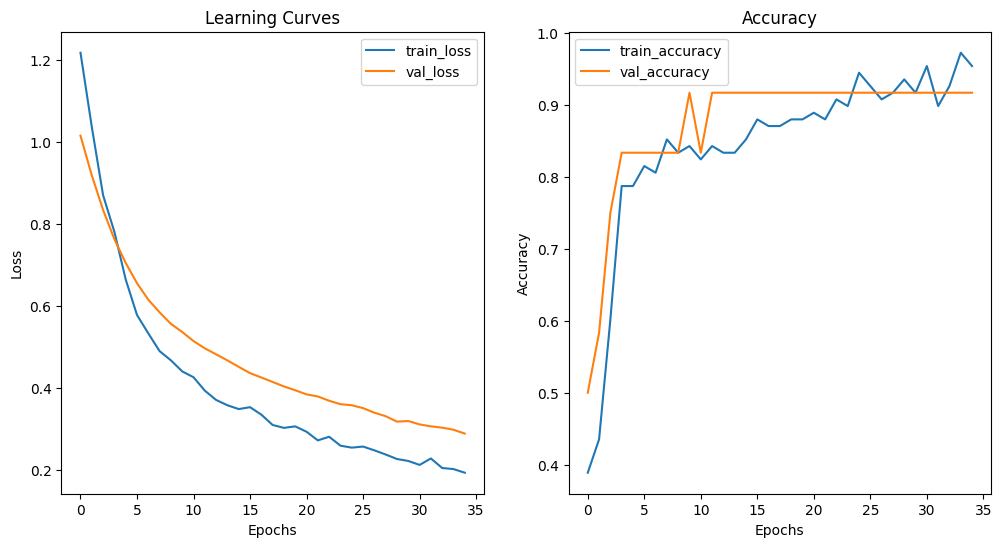

In [52]:
plot_curves(history_v3)

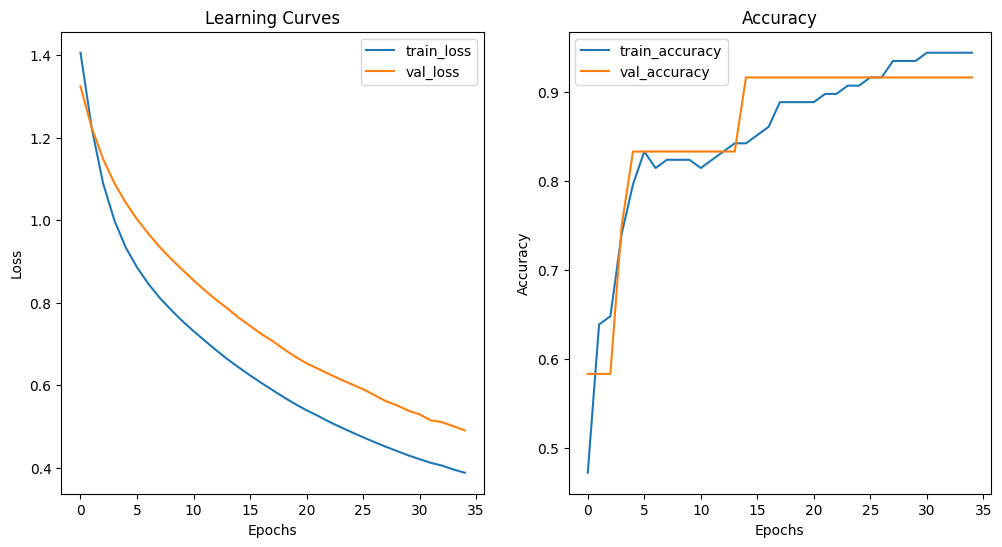

In [51]:
plot_curves(history_v4)

![alt text](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png)

Зниження Bias помилки (недонавчання):
- Збільшуємо кількість фічей
- Ускладнення моделі
- Зменщення регуляризації
- Застосування більш складних активаційних функцій
- Зміна функції втрат
- Збільшити batch-size

Зниження Variance помилки (перенавчання):
- Збільшення даних
- Зменьшуємо кількість фічей
- Полегшення моделі
- Збільшуємо регуляризацію
- Застосування більш просих активаційних функцій
- Зміна функції втрат
- Зменьшити batch-size